# LIF Model

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class LIF:
    def __init__(self, dt=0.1, tau_m=100, R_m=10, E_L=-70, V_rest=-80, V_th=-54, V_spike=0, I=0):
        self.dt = dt
        self.tau_m = tau_m
        self.R_m = R_m
        self.E_L = E_L
        self.V_rest = V_rest
        self.V_th = V_th
        self.V_spike = V_spike
        self.I = I
        self.V = E_L

    def set_current(self, I):
        self.I = I

    def step(self):
        if abs(self.V - self.V_spike) <= 1e-6:
            self.V = self.V_rest
            return 0
        else:
            dV = (self.E_L - self.V + self.R_m * self.I) / self.tau_m * self.dt
            self.V += dV
            if self.V >= self.V_th:
                self.V = self.V_spike
                return 1
            else:
                return 0

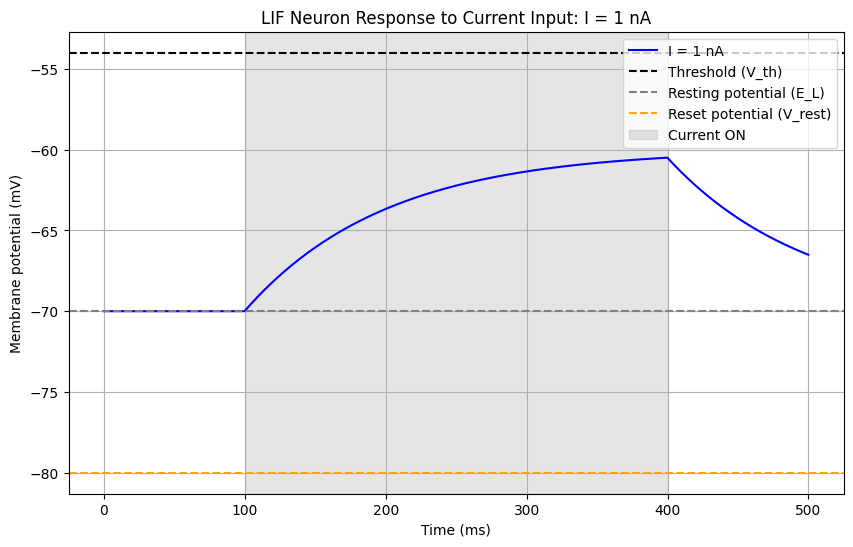

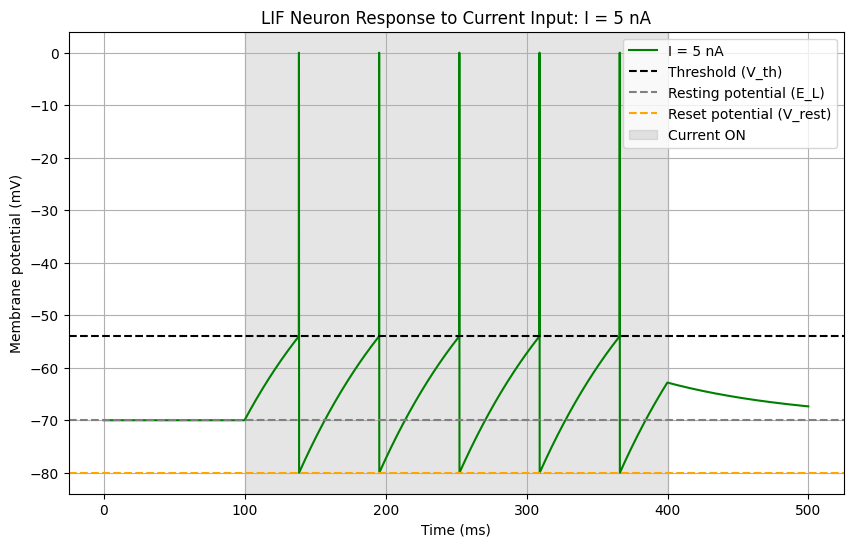

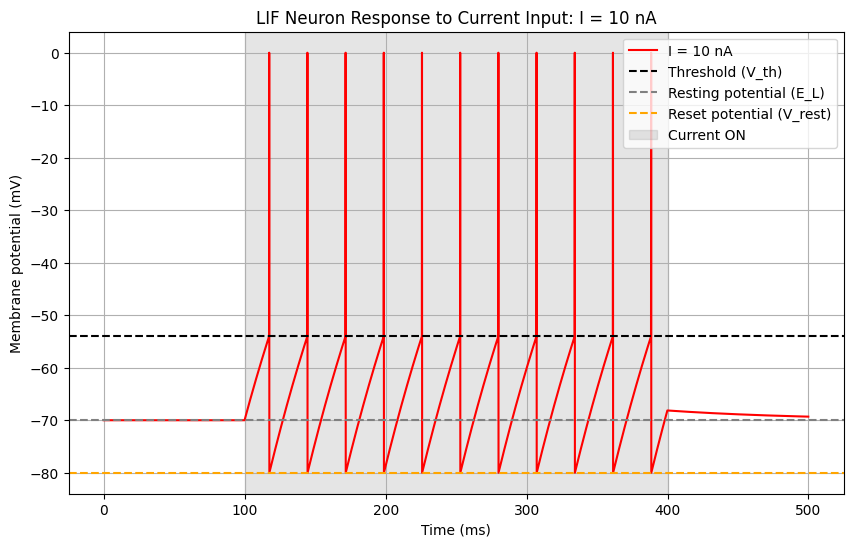

In [7]:
T = 500
dt = 0.1
t = np.arange(0, T, dt)

# Create three LIF neurons with the same parameters
lif1 = LIF(dt=dt)
lif2 = LIF(dt=dt)
lif3 = LIF(dt=dt)

# Arrays to store membrane potentials
V1 = np.zeros_like(t)
V2 = np.zeros_like(t)
V3 = np.zeros_like(t)

# Set initial values
V1[0] = lif1.V
V2[0] = lif2.V
V3[0] = lif3.V

# Current amplitudes - modified values
I1 = 1
I2 = 5
I3 = 10

# Simulation loop
for i in range(1, len(t)):
    # Apply current during the middle 300ms
    if 100 <= t[i] < 400:
        lif1.set_current(I1)
        lif2.set_current(I2)
        lif3.set_current(I3)
    else:
        lif1.set_current(0)
        lif2.set_current(0)
        lif3.set_current(0)
    
    # Update states
    spike1 = lif1.step()
    spike2 = lif2.step()
    spike3 = lif3.step()
    
    # Store membrane potentials
    V1[i] = lif1.V
    V2[i] = lif2.V
    V3[i] = lif3.V

# Plot first figure for I1
plt.figure(figsize=(10, 6))
plt.plot(t, V1, label=f'I = {I1} nA', color='b')
plt.axhline(lif1.V_th, color='black', linestyle='--', label='Threshold (V_th)')
plt.axhline(lif1.E_L, color='gray', linestyle='--', label='Resting potential (E_L)')
plt.axhline(lif1.V_rest, color="orange", linestyle='--', label='Reset potential (V_rest)')
plt.axvspan(100, 400, color='gray', alpha=0.2, label='Current ON')
plt.title(f'LIF Neuron Response to Current Input: I = {I1} nA')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Plot second figure for I2
plt.figure(figsize=(10, 6))
plt.plot(t, V2, label=f'I = {I2} nA', color='g')
plt.axhline(lif2.V_th, color='black', linestyle='--', label='Threshold (V_th)')
plt.axhline(lif2.E_L, color='gray', linestyle='--', label='Resting potential (E_L)')
plt.axhline(lif2.V_rest, color="orange", linestyle='--', label='Reset potential (V_rest)')
plt.axvspan(100, 400, color='gray', alpha=0.2, label='Current ON')
plt.title(f'LIF Neuron Response to Current Input: I = {I2} nA')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Plot third figure for I3
plt.figure(figsize=(10, 6))
plt.plot(t, V3, label=f'I = {I3} nA', color='r')
plt.axhline(lif3.V_th, color='black', linestyle='--', label='Threshold (V_th)')
plt.axhline(lif3.E_L, color='gray', linestyle='--', label='Resting potential (E_L)')
plt.axhline(lif3.V_rest, color="orange", linestyle='--', label='Reset potential (V_rest)')
plt.axvspan(100, 400, color='gray', alpha=0.2, label='Current ON')
plt.title(f'LIF Neuron Response to Current Input: I = {I3} nA')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# 模拟视网膜细胞 ON/OFF center 感受野
视锥细胞、水平细胞、双极细胞、神经节细胞等
复现并绘制不同光线刺激下的神经元活动，描述动态过程，解释原理

## a) 视锥细胞接收亮/暗点输入时 ON/OFF center 神经回路的神经活动

In [8]:
class basic:
    def __init__(self, state=0):
        self.state = state

class cone(basic):
    def __init__(self, state=0):
        super().__init__(state)
        
    def feel_light(self, light):
        self.state = -light

class on_bipolar(basic):
    def __init__(self, state=0):
        super().__init__(state)
        
    def feel(self, cell):
        self.state = -cell.state

class off_bipolar(basic):
    def __init__(self, state=0):
        super().__init__(state)
        
    def feel(self, cell):
        self.state = cell.state

class ganglion(basic, LIF):
    def __init__(self, state=0, dt=0.1, tau_m=100, R_m=10, E_L=-70, V_rest=-80, V_th=-54, V_spike=0, I=5, I_change=10):
        basic.__init__(self, state)
        LIF.__init__(self, dt, tau_m, R_m, E_L, V_rest, V_th, V_spike, I)
        self.initial_I = I
        self.I_change = I_change

    def feel(self, cell):
        self.state = cell.state
        self.set_current(self.initial_I + self.state * self.I_change)

### 亮点

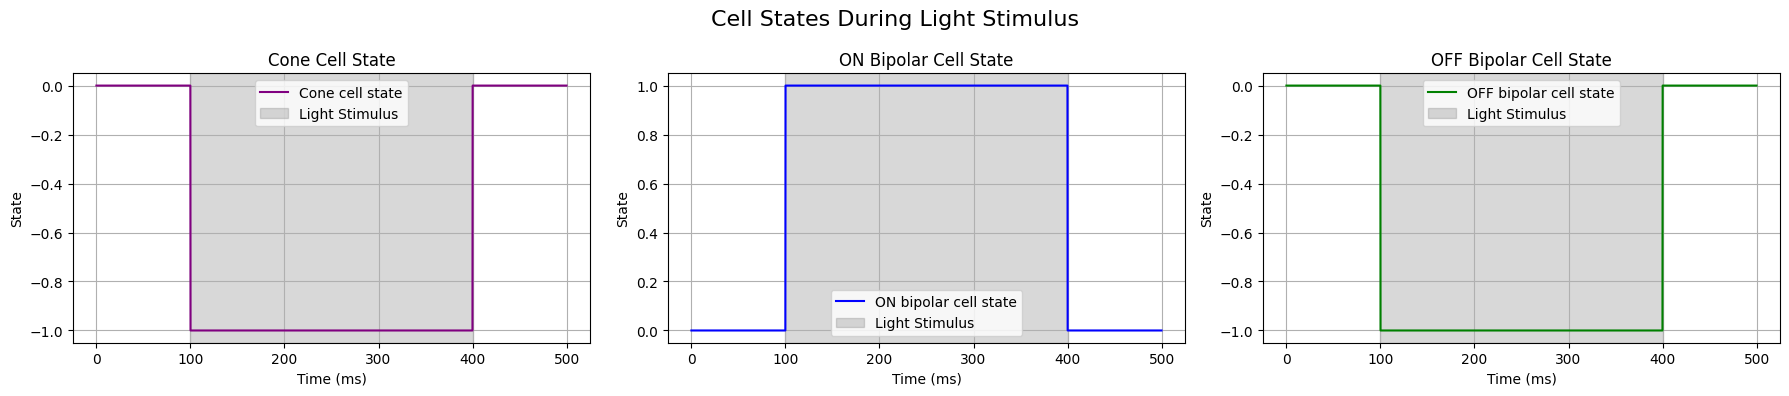

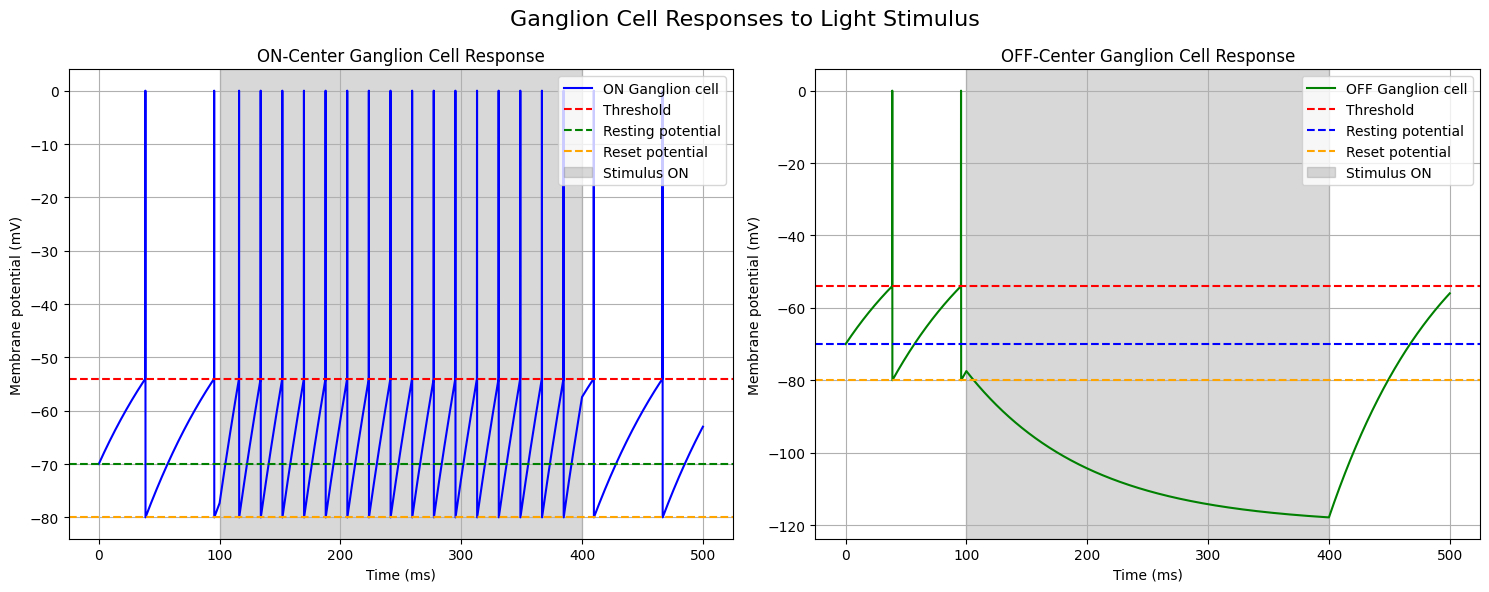

In [9]:
T = 500
dt = 0.1
t = np.arange(0, T, dt)
cone_cell = cone()
on_bipolar_cell = on_bipolar()
off_bipolar_cell = off_bipolar()
on_ganglion_cell = ganglion()
off_ganglion_cell = ganglion()

state_cone = np.zeros_like(t)
state_on_bipolar = np.zeros_like(t)
state_off_bipolar = np.zeros_like(t)
state_cone[0] = cone_cell.state
state_on_bipolar[0] = on_bipolar_cell.state
state_off_bipolar[0] = off_bipolar_cell.state

V_on = np.zeros_like(t)
V_off = np.zeros_like(t)
V_on[0] = on_ganglion_cell.V
V_off[0] = off_ganglion_cell.V

# light is -1, 0, 1

for i in range(1, len(t)):
    if 100 <= t[i] < 400:
        cone_cell.feel_light(1)
    else:
        cone_cell.feel_light(0)
    on_bipolar_cell.feel(cone_cell)
    off_bipolar_cell.feel(cone_cell)
    on_ganglion_cell.feel(on_bipolar_cell)
    off_ganglion_cell.feel(off_bipolar_cell)

    state_cone[i] = cone_cell.state
    state_on_bipolar[i] = on_bipolar_cell.state
    state_off_bipolar[i] = off_bipolar_cell.state
    
    spike_on = on_ganglion_cell.step()
    spike_off = off_ganglion_cell.step()
    V_on[i] = on_ganglion_cell.V
    V_off[i] = off_ganglion_cell.V

# Create a figure to plot the states of different cells
fig_states, axes = plt.subplots(1, 3, figsize=(18, 4))

# Plot cone cell state
axes[0].plot(t, state_cone, label='Cone cell state', color='purple')
axes[0].axvspan(100, 400, color='gray', alpha=0.3, label='Light Stimulus')
axes[0].set_title('Cone Cell State')
axes[0].set_xlabel('Time (ms)')
axes[0].set_ylabel('State')
axes[0].legend()
axes[0].grid(True)

# Plot ON bipolar cell state
axes[1].plot(t, state_on_bipolar, label='ON bipolar cell state', color='blue')
axes[1].axvspan(100, 400, color='gray', alpha=0.3, label='Light Stimulus')
axes[1].set_title('ON Bipolar Cell State')
axes[1].set_xlabel('Time (ms)')
axes[1].set_ylabel('State')
axes[1].legend()
axes[1].grid(True)

# Plot OFF bipolar cell state
axes[2].plot(t, state_off_bipolar, label='OFF bipolar cell state', color='green')
axes[2].axvspan(100, 400, color='gray', alpha=0.3, label='Light Stimulus')
axes[2].set_title('OFF Bipolar Cell State')
axes[2].set_xlabel('Time (ms)')
axes[2].set_ylabel('State')
axes[2].legend()
axes[2].grid(True)

plt.suptitle('Cell States During Light Stimulus', fontsize=16)
plt.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot ON ganglion cell
ax1.plot(t, V_on, label='ON Ganglion cell', color='b')
ax1.axhline(on_ganglion_cell.V_th, color='r', linestyle='--', label='Threshold')
ax1.axhline(on_ganglion_cell.E_L, color='g', linestyle='--', label='Resting potential')
ax1.axhline(on_ganglion_cell.V_rest, color="orange", linestyle='--', label='Reset potential')
ax1.axvspan(100, 400, color='gray', alpha=0.3, label='Stimulus ON')
ax1.set_title('ON-Center Ganglion Cell Response')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane potential (mV)')
ax1.legend(loc='upper right')
ax1.grid()

# Plot OFF ganglion cell
ax2.plot(t, V_off, label='OFF Ganglion cell', color='g')
ax2.axhline(off_ganglion_cell.V_th, color='r', linestyle='--', label='Threshold')
ax2.axhline(off_ganglion_cell.E_L, color='b', linestyle='--', label='Resting potential')
ax2.axhline(off_ganglion_cell.V_rest, color="orange", linestyle='--', label='Reset potential')
ax2.axvspan(100, 400, color='gray', alpha=0.3, label='Stimulus ON')
ax2.set_title('OFF-Center Ganglion Cell Response')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Membrane potential (mV)')
ax2.legend(loc='upper right')
ax2.grid()

plt.suptitle('Ganglion Cell Responses to Light Stimulus', fontsize=16)
plt.tight_layout()
plt.show()

### 暗点

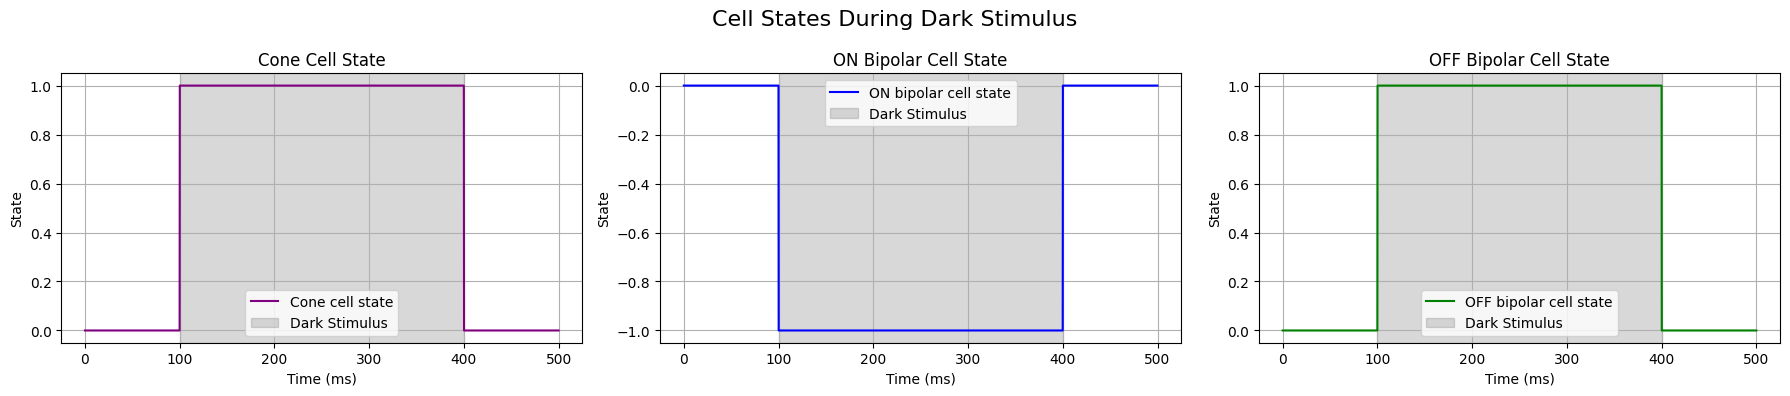

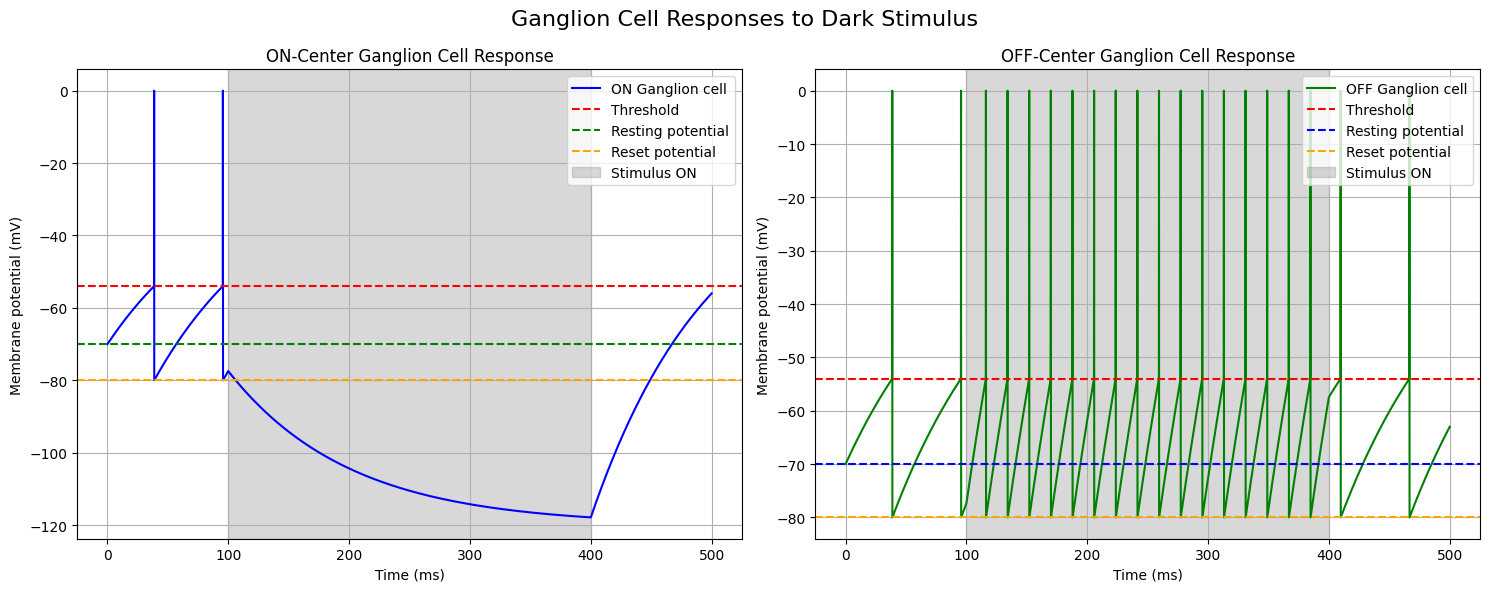

In [10]:
T = 500
dt = 0.1
t = np.arange(0, T, dt)
cone_cell = cone()
on_bipolar_cell = on_bipolar()
off_bipolar_cell = off_bipolar()
on_ganglion_cell = ganglion()
off_ganglion_cell = ganglion()

state_cone = np.zeros_like(t)
state_on_bipolar = np.zeros_like(t)
state_off_bipolar = np.zeros_like(t)
state_cone[0] = cone_cell.state
state_on_bipolar[0] = on_bipolar_cell.state
state_off_bipolar[0] = off_bipolar_cell.state

V_on = np.zeros_like(t)
V_off = np.zeros_like(t)
V_on[0] = on_ganglion_cell.V
V_off[0] = off_ganglion_cell.V

# light is -1, 0, 1

for i in range(1, len(t)):
    if 100 <= t[i] < 400:
        cone_cell.feel_light(-1)
    else:
        cone_cell.feel_light(0)
    on_bipolar_cell.feel(cone_cell)
    off_bipolar_cell.feel(cone_cell)
    on_ganglion_cell.feel(on_bipolar_cell)
    off_ganglion_cell.feel(off_bipolar_cell)

    state_cone[i] = cone_cell.state
    state_on_bipolar[i] = on_bipolar_cell.state
    state_off_bipolar[i] = off_bipolar_cell.state
    
    spike_on = on_ganglion_cell.step()
    spike_off = off_ganglion_cell.step()
    V_on[i] = on_ganglion_cell.V
    V_off[i] = off_ganglion_cell.V

# Create a figure to plot the states of different cells
fig_states, axes = plt.subplots(1, 3, figsize=(18, 4))

# Plot cone cell state
axes[0].plot(t, state_cone, label='Cone cell state', color='purple')
axes[0].axvspan(100, 400, color='gray', alpha=0.3, label='Dark Stimulus')
axes[0].set_title('Cone Cell State')
axes[0].set_xlabel('Time (ms)')
axes[0].set_ylabel('State')
axes[0].legend()
axes[0].grid(True)

# Plot ON bipolar cell state
axes[1].plot(t, state_on_bipolar, label='ON bipolar cell state', color='blue')
axes[1].axvspan(100, 400, color='gray', alpha=0.3, label='Dark Stimulus')
axes[1].set_title('ON Bipolar Cell State')
axes[1].set_xlabel('Time (ms)')
axes[1].set_ylabel('State')
axes[1].legend()
axes[1].grid(True)

# Plot OFF bipolar cell state
axes[2].plot(t, state_off_bipolar, label='OFF bipolar cell state', color='green')
axes[2].axvspan(100, 400, color='gray', alpha=0.3, label='Dark Stimulus')
axes[2].set_title('OFF Bipolar Cell State')
axes[2].set_xlabel('Time (ms)')
axes[2].set_ylabel('State')
axes[2].legend()
axes[2].grid(True)

plt.suptitle('Cell States During Dark Stimulus', fontsize=16)
plt.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot ON ganglion cell
ax1.plot(t, V_on, label='ON Ganglion cell', color='b')
ax1.axhline(on_ganglion_cell.V_th, color='r', linestyle='--', label='Threshold')
ax1.axhline(on_ganglion_cell.E_L, color='g', linestyle='--', label='Resting potential')
ax1.axhline(on_ganglion_cell.V_rest, color="orange", linestyle='--', label='Reset potential')
ax1.axvspan(100, 400, color='gray', alpha=0.3, label='Stimulus ON')
ax1.set_title('ON-Center Ganglion Cell Response')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane potential (mV)')
ax1.legend(loc='upper right')
ax1.grid()

# Plot OFF ganglion cell
ax2.plot(t, V_off, label='OFF Ganglion cell', color='g')
ax2.axhline(off_ganglion_cell.V_th, color='r', linestyle='--', label='Threshold')
ax2.axhline(off_ganglion_cell.E_L, color='b', linestyle='--', label='Resting potential')
ax2.axhline(off_ganglion_cell.V_rest, color="orange", linestyle='--', label='Reset potential')
ax2.axvspan(100, 400, color='gray', alpha=0.3, label='Stimulus ON')
ax2.set_title('OFF-Center Ganglion Cell Response')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Membrane potential (mV)')
ax2.legend(loc='upper right')
ax2.grid()

plt.suptitle('Ganglion Cell Responses to Dark Stimulus', fontsize=16)
plt.tight_layout()
plt.show()

## b) 视锥细胞接受中心/中心+周围输入时，ON center 神经回路的神经活动

In [11]:
class cone2(cone):
    def __init__(self, state=0):
        super().__init__(state)
        
    def feel(self, *cells):
        for cell in cells:
            self.state -= cell.state

class horizontal(basic):
    def __init__(self, state=0):
        super().__init__(state)
        
    def feel(self, cell_1, cell_2):
        self.state = 0.1 * cell_1.state + 0.3 * cell_2.state

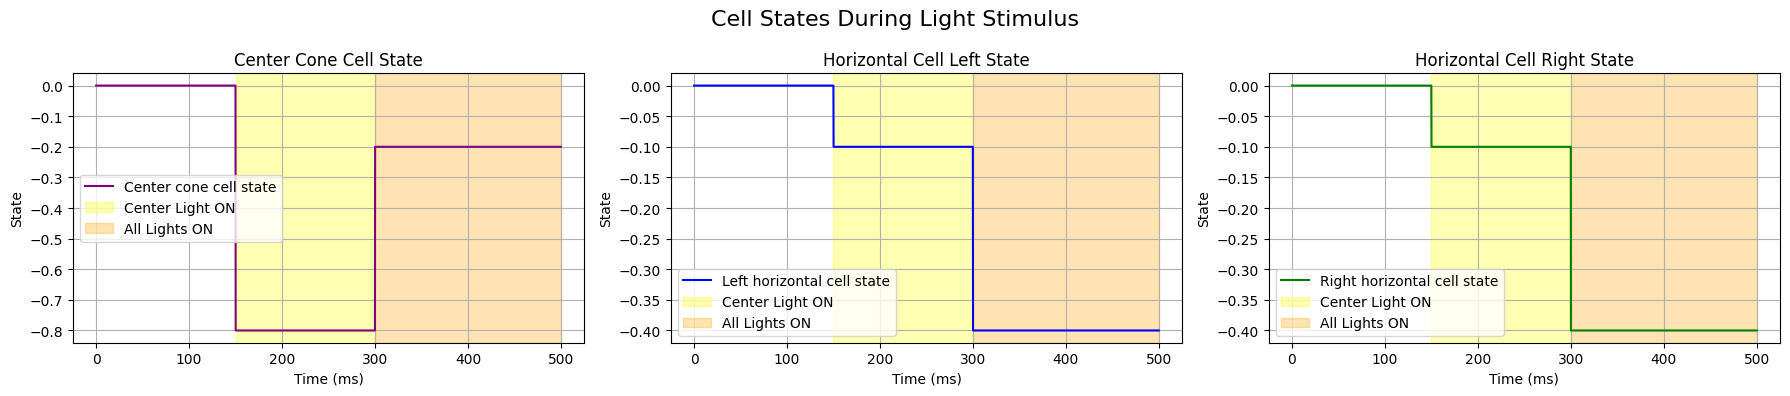

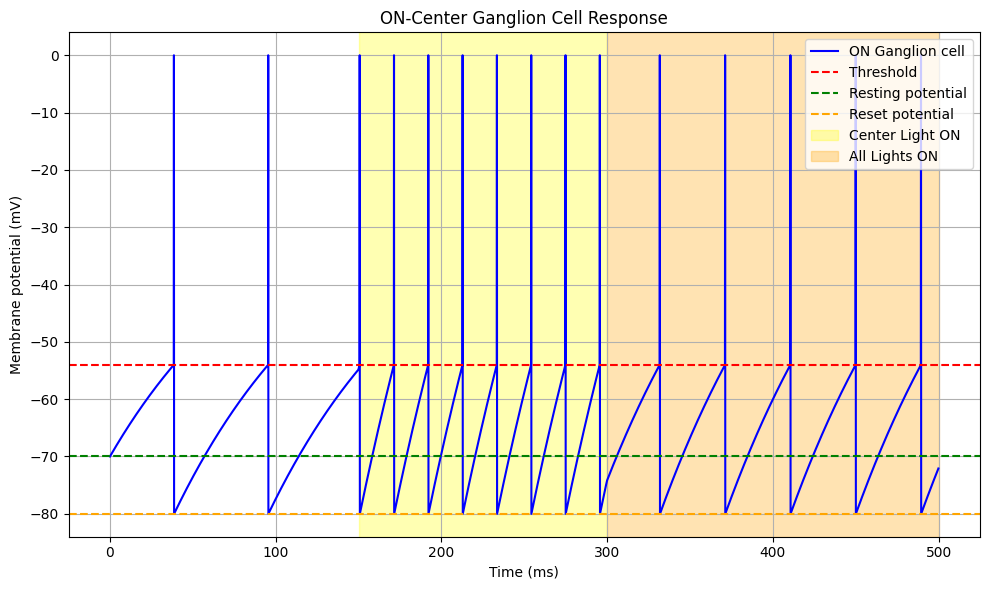

In [12]:
T = 500
dt = 0.1
t = np.arange(0, T, dt)
center_cone = cone2()
surround_cone_l = cone2()
surround_cone_r = cone2()
horizontal_cell_l = horizontal()
horizontal_cell_r = horizontal()
on_bipolar_cell = on_bipolar()
on_ganglion_cell = ganglion()

state_center_cone = np.zeros_like(t)
state_horizontal_l = np.zeros_like(t)
state_horizontal_r = np.zeros_like(t)
state_on_bipolar = np.zeros_like(t)
state_center_cone[0] = center_cone.state
state_horizontal_l[0] = horizontal_cell_l.state
state_horizontal_r[0] = horizontal_cell_r.state
state_on_bipolar[0] = on_bipolar_cell.state

V_on = np.zeros_like(t)
V_on[0] = on_ganglion_cell.V

# light is -1, 0, 1

for i in range(1, len(t)):
    if t[i] < 150:
        center_cone.feel_light(0)
        surround_cone_l.feel_light(0)
        surround_cone_r.feel_light(0)
    elif 150 <= t[i] < 300:
        center_cone.feel_light(1)
        surround_cone_l.feel_light(0)
        surround_cone_r.feel_light(0)
    else:
        center_cone.feel_light(1)
        surround_cone_l.feel_light(1)
        surround_cone_r.feel_light(1)

    horizontal_cell_l.feel(center_cone, surround_cone_l)
    horizontal_cell_r.feel(center_cone, surround_cone_r)
    center_cone.feel(horizontal_cell_l, horizontal_cell_r)
    surround_cone_l.feel(horizontal_cell_l)
    surround_cone_r.feel(horizontal_cell_r)
    on_bipolar_cell.feel(center_cone)
    on_ganglion_cell.feel(on_bipolar_cell)

    state_center_cone[i] = center_cone.state
    state_horizontal_l[i] = horizontal_cell_l.state
    state_horizontal_r[i] = horizontal_cell_r.state
    state_on_bipolar[i] = on_bipolar_cell.state

    spike_on = on_ganglion_cell.step()
    V_on[i] = on_ganglion_cell.V

# Create a figure to plot the states of different cells
fig_states, axes = plt.subplots(1, 3, figsize=(18, 4))
# Plot center cone cell state
axes[0].plot(t, state_center_cone, label='Center cone cell state', color='purple')
axes[0].axvspan(150, 300, color='yellow', alpha=0.3, label='Center Light ON')
axes[0].axvspan(300, 500, color='orange', alpha=0.3, label='All Lights ON')
axes[0].set_title('Center Cone Cell State')
axes[0].set_xlabel('Time (ms)')
axes[0].set_ylabel('State')
axes[0].legend()
axes[0].grid(True)
# Plot horizontal cell left state
axes[1].plot(t, state_horizontal_l, label='Left horizontal cell state', color='blue')
axes[1].axvspan(150, 300, color='yellow', alpha=0.3, label='Center Light ON')
axes[1].axvspan(300, 500, color='orange', alpha=0.3, label='All Lights ON')
axes[1].set_title('Horizontal Cell Left State')
axes[1].set_xlabel('Time (ms)')
axes[1].set_ylabel('State')
axes[1].legend()
axes[1].grid(True)
# Plot horizontal cell right state
axes[2].plot(t, state_horizontal_r, label='Right horizontal cell state', color='green')
axes[2].axvspan(150, 300, color='yellow', alpha=0.3, label='Center Light ON')
axes[2].axvspan(300, 500, color='orange', alpha=0.3, label='All Lights ON')
axes[2].set_title('Horizontal Cell Right State')
axes[2].set_xlabel('Time (ms)')
axes[2].set_ylabel('State')
axes[2].legend()
axes[2].grid(True)
plt.suptitle('Cell States During Light Stimulus', fontsize=16)
plt.tight_layout()
plt.show()

# Create a figure to plot the ON ganglion cell response
plt.figure(figsize=(10, 6))
# Plot ON ganglion cell
plt.plot(t, V_on, label='ON Ganglion cell', color='b')
plt.axhline(on_ganglion_cell.V_th, color='r', linestyle='--', label='Threshold')
plt.axhline(on_ganglion_cell.E_L, color='g', linestyle='--', label='Resting potential')
plt.axhline(on_ganglion_cell.V_rest, color="orange", linestyle='--', label='Reset potential')
plt.axvspan(150, 300, color='yellow', alpha=0.3, label='Center Light ON')
plt.axvspan(300, 500, color='orange', alpha=0.3, label='All Lights ON')
plt.title('ON-Center Ganglion Cell Response')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()
